In [1]:
%run ../scripts/notebook_settings.py
import sgkit as sg
import xarray as xr
import glob

In [2]:
# Loading in the kuderna mutation data and new metadata

kuderna_data = pd.read_csv("../data/science.abn7829_data_s2.csv")
# I pick out the following columns
col_species_mut = ['SPECIES_BINOMIAL', 'GENUS', 'SPECIES', 'FAMILY', 'GENERATION_LENGTH', 'MU_PER_GENERATION',
       'MU_PER_YEAR', 'EFFECTIVE_POP_SIZE']
df_species_mut = kuderna_data[col_species_mut]

metadata_dir = "/home/eriks/primatediversity/data/gVCFs_recalling_10_12_2024_metadata/"
metadata_dirs = glob.glob(metadata_dir+"*_individuals.txt")

df_l = []
for d in metadata_dirs:
    # Identify IDs
    dir_metadata = pd.read_csv(d, sep="\t")
    df_l.append(dir_metadata)
all_inds = pd.concat(df_l)

In [36]:
metadata_dirs = glob.glob(metadata_dir+"*_individuals.txt")
metadata_dirs[:20]

['/home/eriks/primatediversity/data/gVCFs_recalling_10_12_2024_metadata/Carlito_individuals.txt',
 '/home/eriks/primatediversity/data/gVCFs_recalling_10_12_2024_metadata/Lophocebus_individuals.txt',
 '/home/eriks/primatediversity/data/gVCFs_recalling_10_12_2024_metadata/Hoolock_individuals.txt',
 '/home/eriks/primatediversity/data/gVCFs_recalling_10_12_2024_metadata/Galago_individuals.txt',
 '/home/eriks/primatediversity/data/gVCFs_recalling_10_12_2024_metadata/Saguinus_individuals.txt',
 '/home/eriks/primatediversity/data/gVCFs_recalling_10_12_2024_metadata/Papio_individuals.txt',
 '/home/eriks/primatediversity/data/gVCFs_recalling_10_12_2024_metadata/Nomascus_individuals.txt',
 '/home/eriks/primatediversity/data/gVCFs_recalling_10_12_2024_metadata/Chlorocebus_individuals.txt',
 '/home/eriks/primatediversity/data/gVCFs_recalling_10_12_2024_metadata/Cercopithecus_individuals.txt',
 '/home/eriks/primatediversity/data/gVCFs_recalling_10_12_2024_metadata/Pygathrix_individuals.txt',
 '/hom

In [3]:
# Files used
glob.glob("../steps/cobraa/*/aut_D50_ts4_te40*")

['../steps/cobraa/PD_0093/aut_D50_ts4_te40_final_parameters.txt',
 '../steps/cobraa/PD_0032/aut_D50_ts4_te40_final_parameters.txt',
 '../steps/cobraa/SAMEA115412632/aut_D50_ts4_te40_final_parameters.txt',
 '../steps/cobraa/SAMEA2446072/aut_D50_ts4_te40_final_parameters.txt',
 '../steps/cobraa/SAMN43494766/aut_D50_ts4_te40_final_parameters.txt',
 '../steps/cobraa/SAMN25565059/aut_D50_ts4_te40_final_parameters.txt',
 '../steps/cobraa/PD_0060/aut_D50_ts4_te40_final_parameters.txt',
 '../steps/cobraa/SAMEA115412631/aut_D50_ts4_te40_final_parameters.txt',
 '../steps/cobraa/SAMEA112483227/aut_D50_ts4_te40_final_parameters.txt',
 '../steps/cobraa/SAMEA112483030/aut_D50_ts4_te40_final_parameters.txt',
 '../steps/cobraa/SAMN13555793/aut_D50_ts4_te40_final_parameters.txt',
 '../steps/cobraa/SAMEA112483162/aut_D50_ts4_te40_final_parameters.txt',
 '../steps/cobraa/SAMEA112483168/aut_D50_ts4_te40_final_parameters.txt',
 '../steps/cobraa/SAMEA112483237/aut_D50_ts4_te40_final_parameters.txt',
 '../st

In [4]:
# But this investigation will only use individuals from the following geni
metadata_dirs = ['/home/eriks/primatediversity/data/gVCFs_recalling_10_12_2024_metadata/Gorilla_individuals.txt',
                 '/home/eriks/primatediversity/data/gVCFs_recalling_10_12_2024_metadata/Papio_individuals.txt',
                 '/home/eriks/primatediversity/data/gVCFs_recalling_10_12_2024_metadata/Cercopithecus_individuals.txt']

ind_list = [x.split("/")[3] for x in glob.glob("../steps/cobraa/*/aut_D50_ts4_te40*")]
ind_list

['PD_0093',
 'PD_0032',
 'SAMEA115412632',
 'SAMEA2446072',
 'SAMN43494766',
 'SAMN25565059',
 'PD_0060',
 'SAMEA115412631',
 'SAMEA112483227',
 'SAMEA112483030',
 'SAMN13555793',
 'SAMEA112483162',
 'SAMEA112483168',
 'SAMEA112483237',
 'SAMEA3939558']

In [5]:
def get_gamma_from_file(file):
    lines = !cat {file}
    return float([i for i in lines if 'gamma' in i][0].split(' ')[-1])
    
def get_LL_from_file(filename):
    with open(filename) as f:
        lines = f.readlines()
    return float([i for i in lines if 'likelihood' in i and 'final' in i][0].split(' ')[-1])

Gorilla_gorilla_ssp
SAMEA2446072 -19482594.971031114 2311.8692664429545 0.011866331306894684
Gorilla_beringei_ssp
SAMEA3939558 -8483815.102457134 1302.7816337309778 0.015356082352073636
Papio_hamadryas_ssp
SAMEA112483168 -14494906.097818607 729.0350815113634 0.00502959506320002
Papio_cynocephalus_ssp
SAMEA112483237 -21906762.001683395 4180.060977060348 0.01908114479327952
Papio_anubis_ssp
SAMN43494766 -18637545.416487016 4437.5428510047495 0.02380969570745749
Papio_kindae_ssp
SAMEA112483227 -23659483.25854172 5632.229295946658 0.023805377464925268
Papio_papio_ssp
SAMEA112483030 -5557413.699878445 443.06836849823594 0.007972564081524594
Papio_ursinus_ssp
SAMEA112483162 -18495471.6882069 2810.18863267079 0.015193927897835798
Cercopithecus_mitis_ssp
SAMN25565059 -11669918.188317072 3516.304819231853 0.0301313579280451
Cercopithecus_mona_ssp
SAMN13555793 -20471368.641835544 3765.4265719279647 0.01839362398190071
Cercopithecus_roloway_ssp
PD_0093 -24044730.03218566 9988.733524002135 0.04154

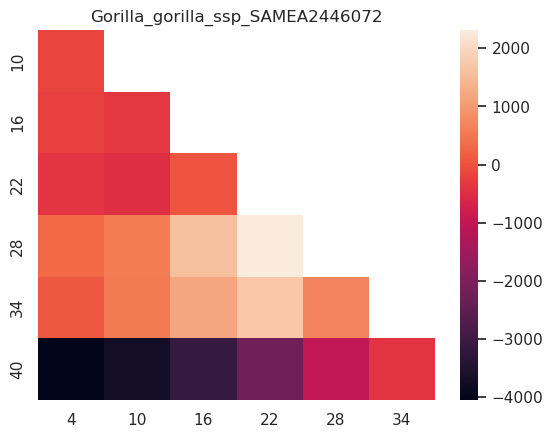

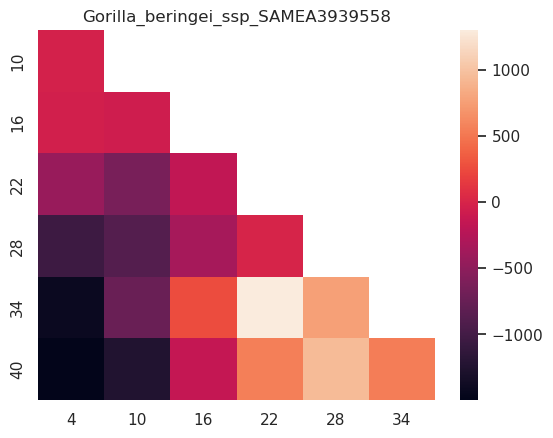

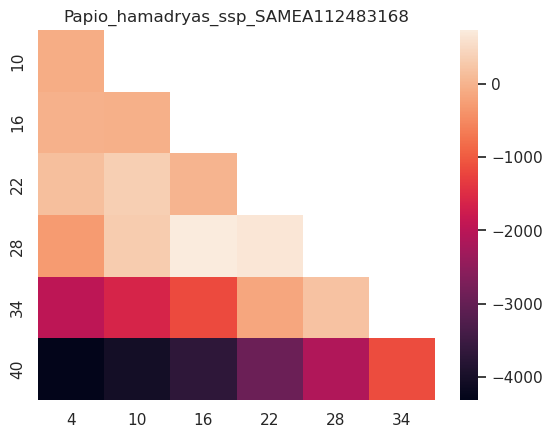

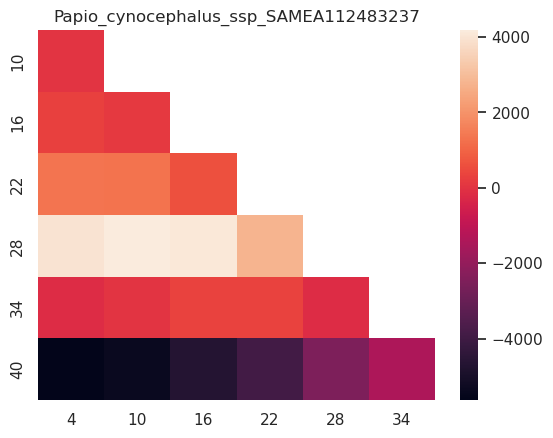

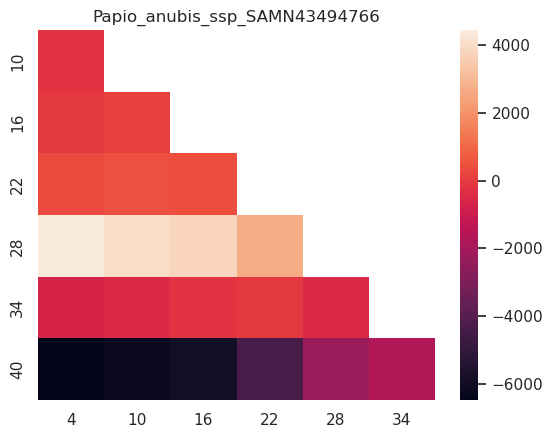

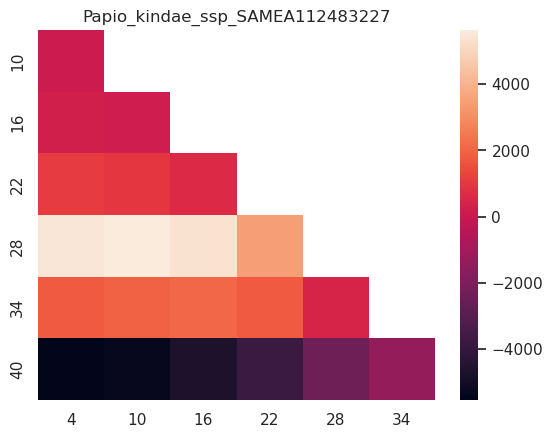

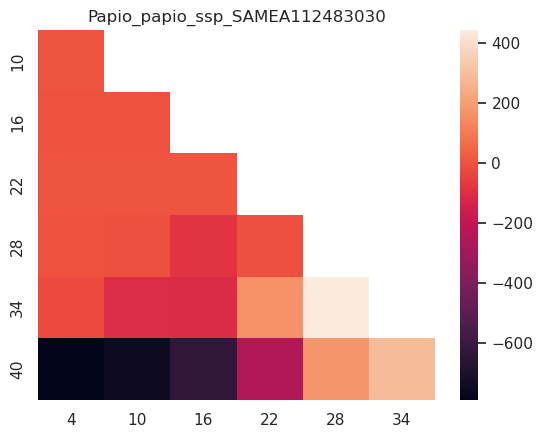

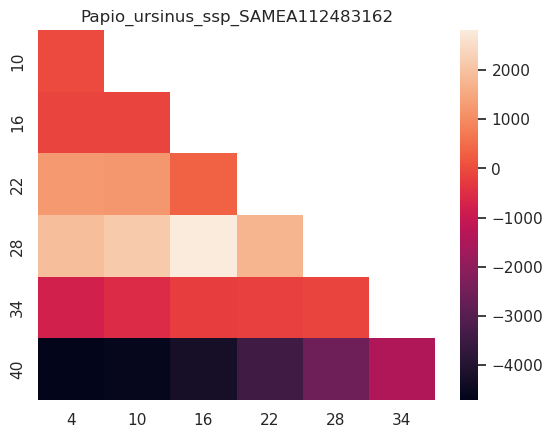

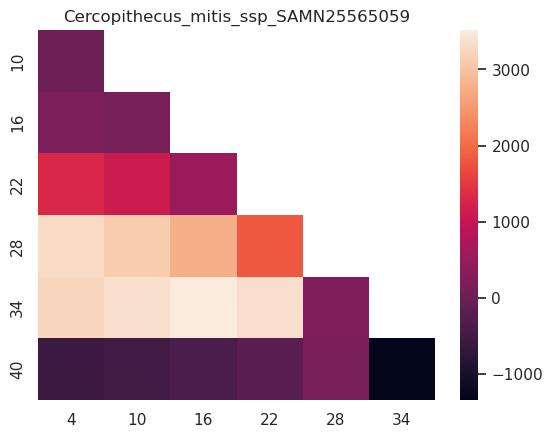

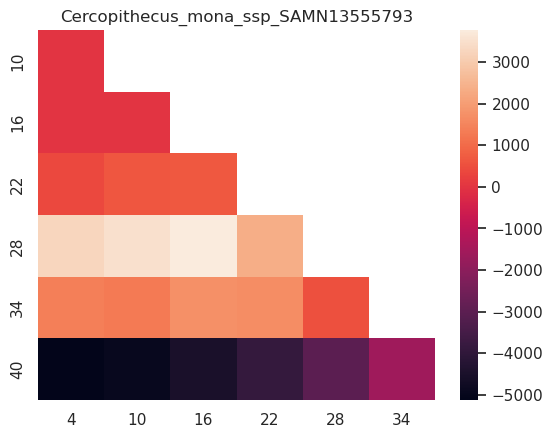

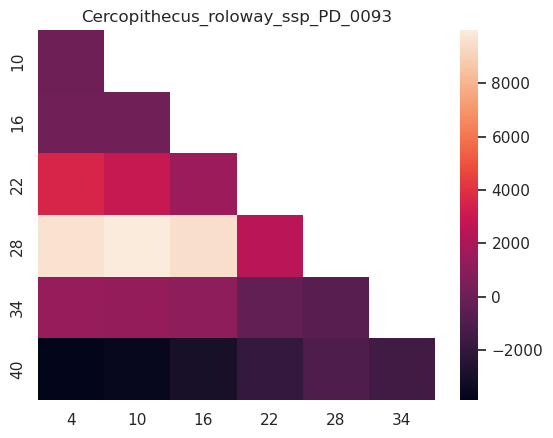

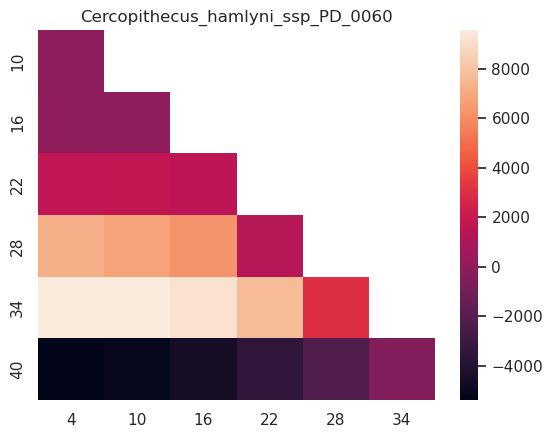

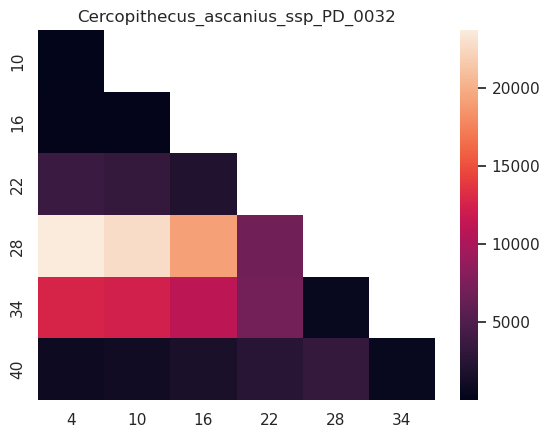

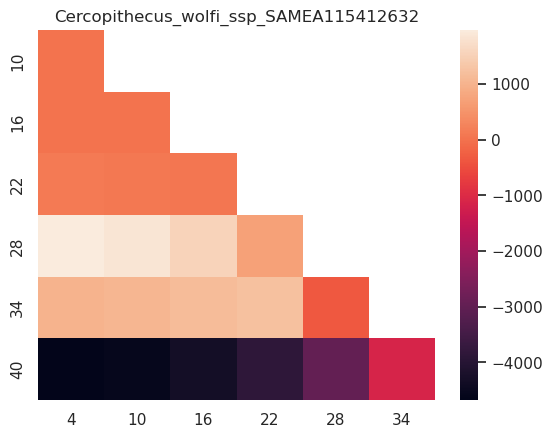

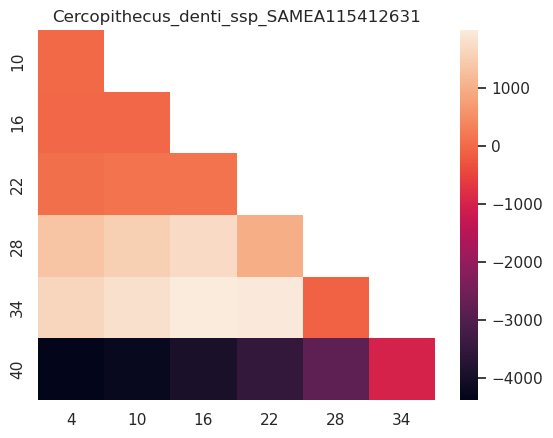

<Figure size 640x480 with 0 Axes>

In [9]:
for d in metadata_dirs:
    # Identify IDs
    dir_metadata = pd.read_csv(d, sep="\t")
    dir_metadata["gss"] = dir_metadata.GENUS+"_"+dir_metadata.SPECIES+"_"+dir_metadata.SUBSPECIES
    short_species = d.split("/")[-1].split("_")[0]
    female_df = dir_metadata[pd.to_numeric(dir_metadata['AVG_COVERAGE_X'], errors='coerce').notnull()]
    female_df = female_df.loc[(female_df.GENETIC_SEX == "F") & (female_df.AVG_COVERAGE_A >= 10)].sort_values(by="AVG_COVERAGE_A", ascending=False)
    sorted_df = female_df
    # Go through every unique genotype calling set.
    for gvcf_folder in sorted_df.GVCF_FOLDER.unique():
        print(gvcf_folder)
        # Pick all inds that are present in the cobraa analysis.
        species_df = sorted_df.loc[sorted_df.GVCF_ID.isin(ind_list) & (sorted_df.GVCF_FOLDER == gvcf_folder)]
        for ind in species_df.GVCF_ID:
            final_params_file_pan = f'../steps/cobraa/{ind}/aut_final_parameters.txt'
            pan_LL = get_LL_from_file(final_params_file_pan)
            matrix_LL_diffs = np.zeros(shape=(6,6))
            matrix_LL_diffs[:] = np.nan
            for te in range(10, 42, 6):
                for ts in range(4, te-4, 6):
                    final_params_file_struct = f'../steps/cobraa/{ind}/aut_D50_ts{ts}_te{te}_final_parameters.txt'
                    struct_LL = get_LL_from_file(final_params_file_struct)
                    diff_LL = struct_LL - pan_LL
                    matrix_LL_diffs[int((te-6)/6),int(ts/6)] = diff_LL
            matrix_LL_diffs = matrix_LL_diffs
            print(ind, pan_LL, np.nanmax(matrix_LL_diffs), -100*np.nanmax(matrix_LL_diffs)/pan_LL)
            g = sns.heatmap(matrix_LL_diffs)
            g.set(xticklabels=list(range(4, te-4, 6)), yticklabels=list(range(10, 42, 6)),title=gvcf_folder+"_"+ind)
            plt.figure()

Pop history plotting

In [10]:
def find_best(file_list):
    best_param_file = None
    best_val = None
    # Go through the files and pick the 
    for p in file_list:
        LL = get_LL_from_file(p)
        if best_val == None:
            best_val = LL
            best_param_file = p
        if best_val < LL:
            best_val = LL
            best_param_file = p

    with open(best_param_file) as f:
        finallines = f.readlines()
    ztheta = float([i for i in finallines if 'theta' in i ][0].split(' ')[-1])
    zrho = float([i for i in finallines if 'rho' in i ][0].split(' ')[-1])
    zgamma = float([i for i in finallines if 'gamma' in i ][0].split(' ')[-1])
    file_name = best_param_file.split("/")[-1]
    zte = int(file_name.split("te")[1].split("_")[0])
    zts = int(file_name.split("ts")[1].split("_")[0])
    
    final_params = np.loadtxt(best_param_file)
    lambdaA_parameters = ",".join([str(x) for x in final_params[:,2]*ztheta/4])
    lambdaB_parameters = ",".join([str(x) for x in final_params[:,3]*ztheta/4])
    return zte, zts, ztheta, zrho, zgamma, lambdaA_parameters, lambdaB_parameters, best_param_file

Gorilla_gorilla_ssp
28 22 0.40601336727431236 ../steps/cobraa/SAMEA2446072/aut_D50_ts22_te28_final_parameters.txt
1.33e-08 22.0
Gorilla_beringei_ssp
34 22 0.41645186149817737 ../steps/cobraa/SAMEA3939558/aut_D50_ts22_te34_final_parameters.txt
1.2e-08 20.0
Papio_hamadryas_ssp
28 16 0.2855779807275157 ../steps/cobraa/SAMEA112483168/aut_D50_ts16_te28_final_parameters.txt
6.08e-09 15.0
Papio_cynocephalus_ssp
28 10 0.3165423122822582 ../steps/cobraa/SAMEA112483237/aut_D50_ts10_te28_final_parameters.txt
5.88e-09 17.0
Papio_anubis_ssp
28 4 0.2608795217081541 ../steps/cobraa/SAMN43494766/aut_D50_ts4_te28_final_parameters.txt
3.91e-09 11.0
Papio_kindae_ssp
28 10 0.3393568364880518 ../steps/cobraa/SAMEA112483227/aut_D50_ts10_te28_final_parameters.txt
7.18e-09 17.0
Papio_papio_ssp
34 28 0.21431887615043205 ../steps/cobraa/SAMEA112483030/aut_D50_ts28_te34_final_parameters.txt
5.04e-09 10.0
Papio_ursinus_ssp
28 16 0.323871153373786 ../steps/cobraa/SAMEA112483162/aut_D50_ts16_te28_final_parameters.t

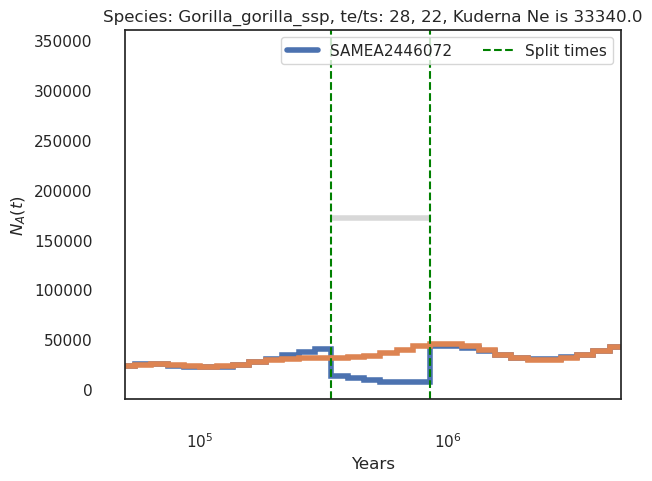

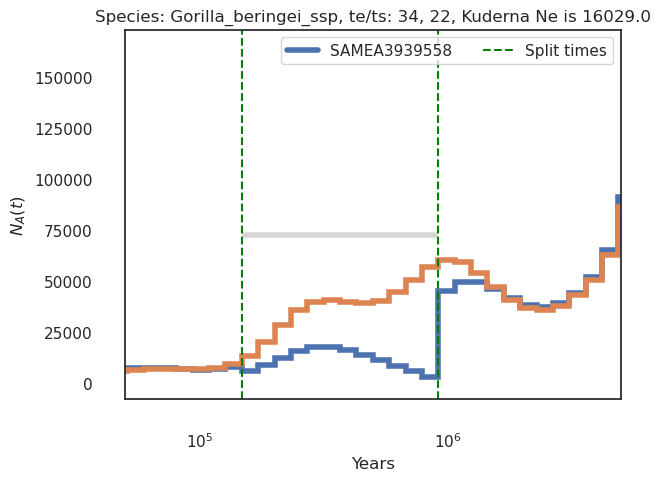

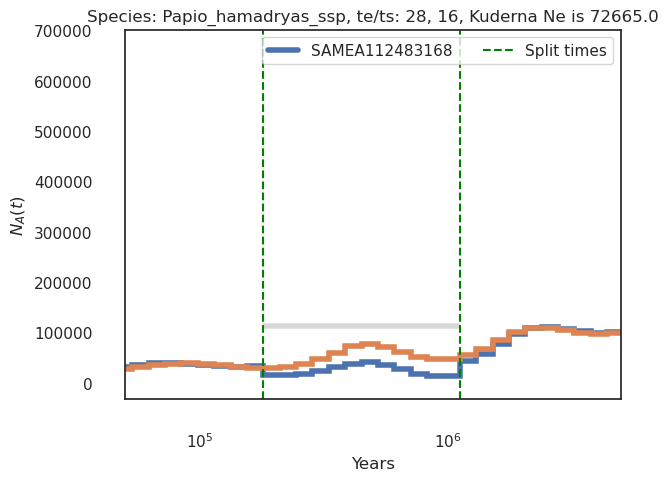

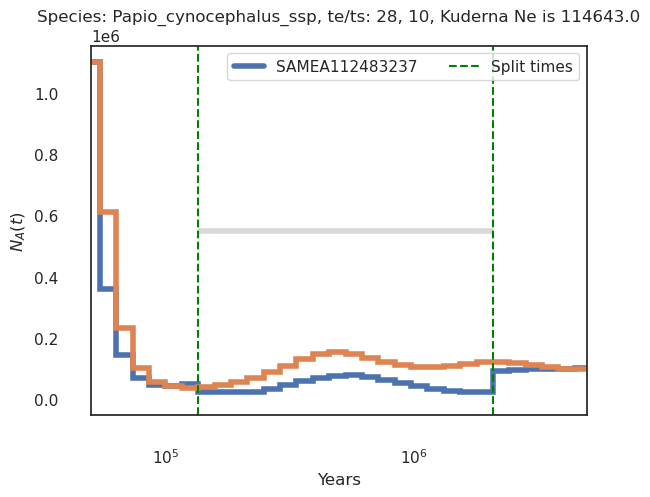

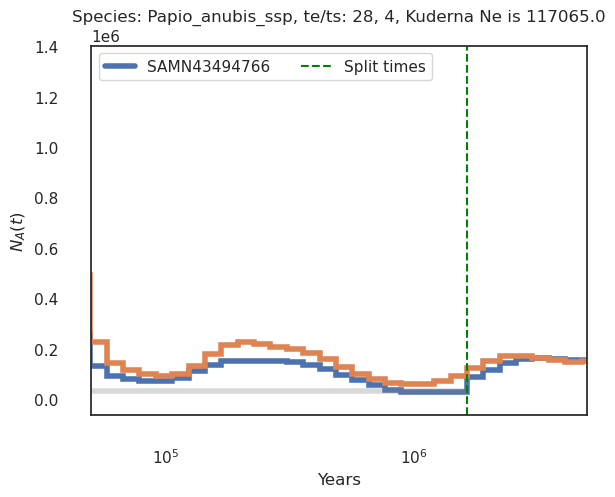

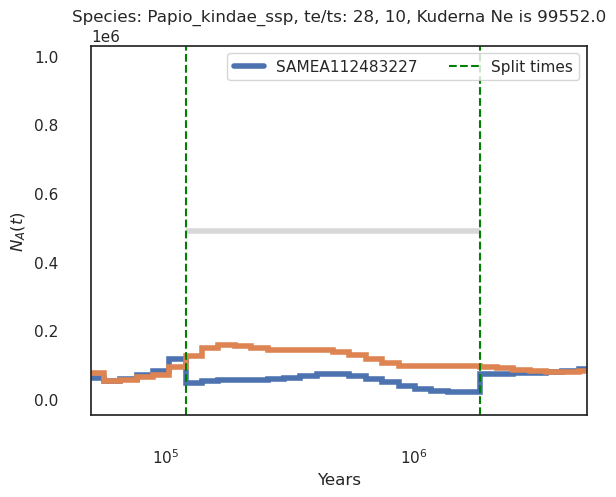

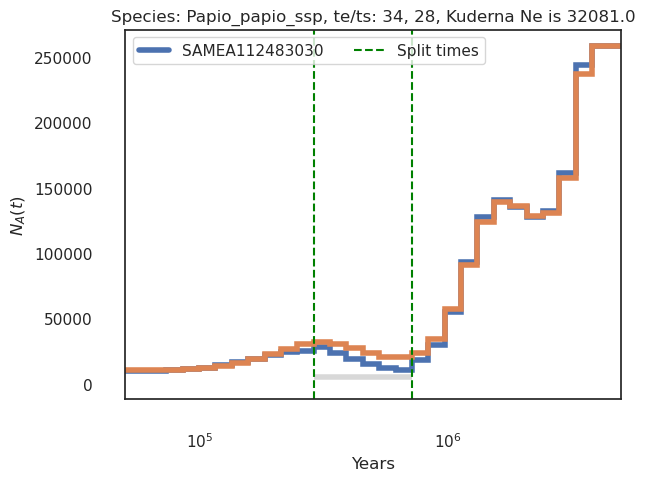

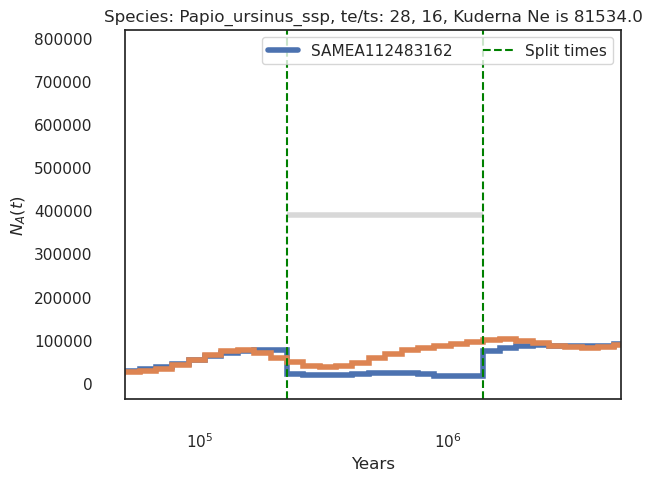

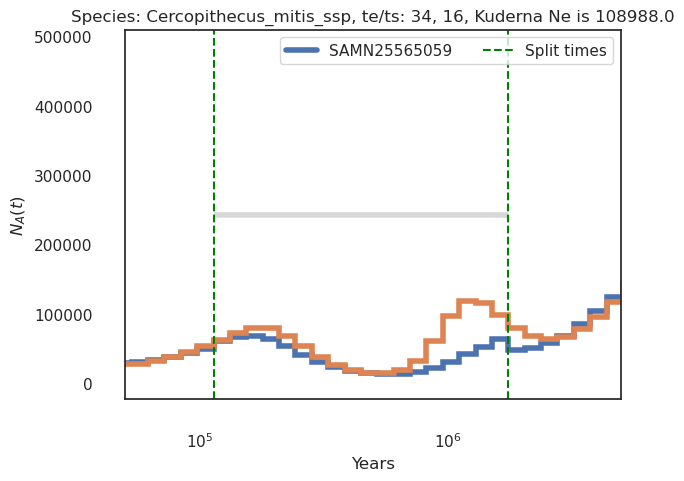

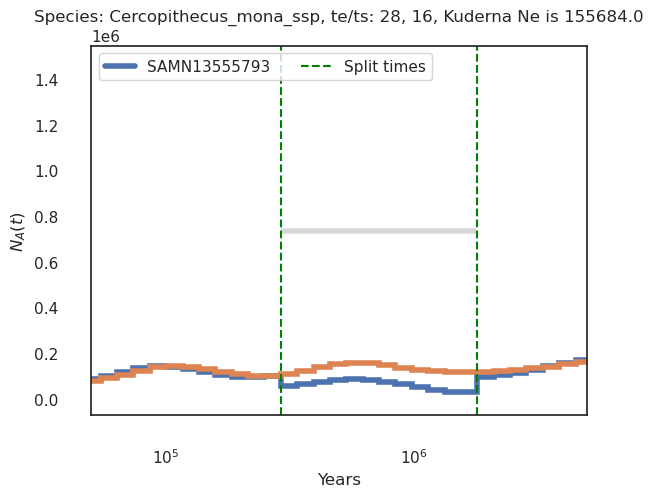

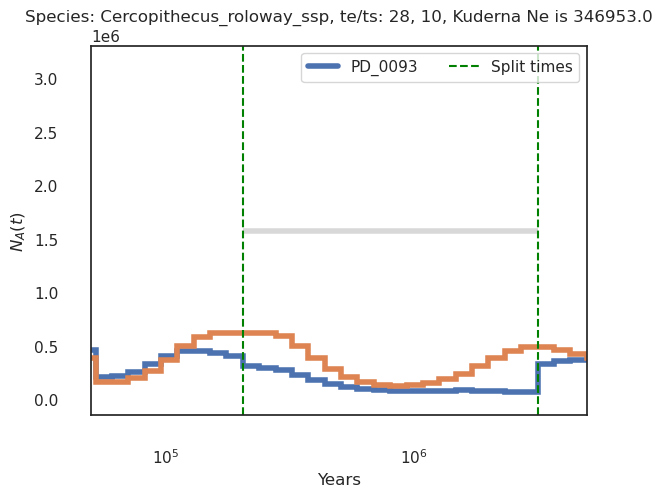

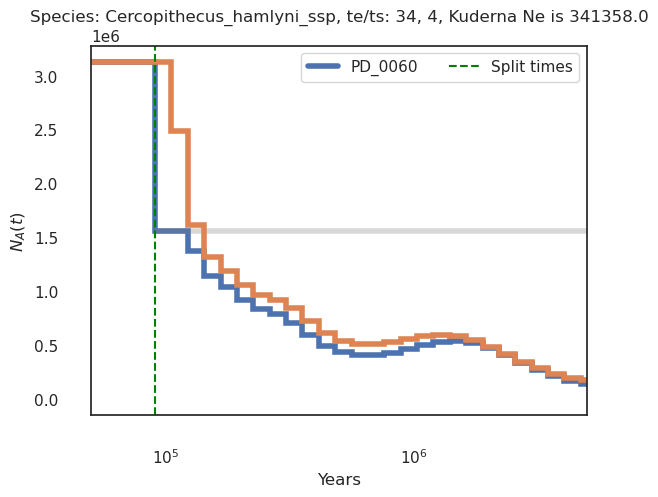

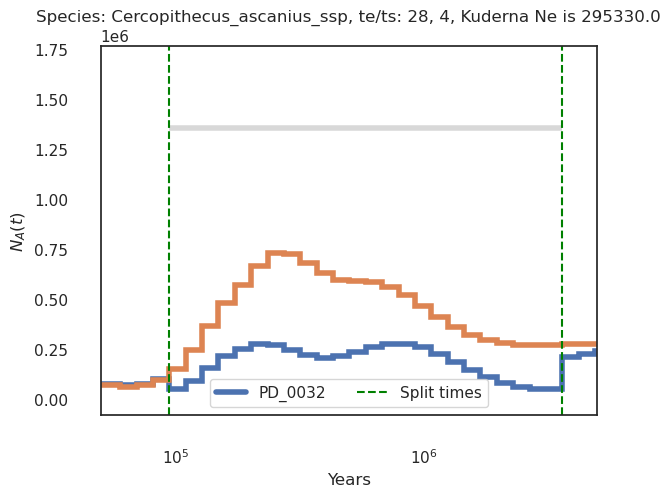

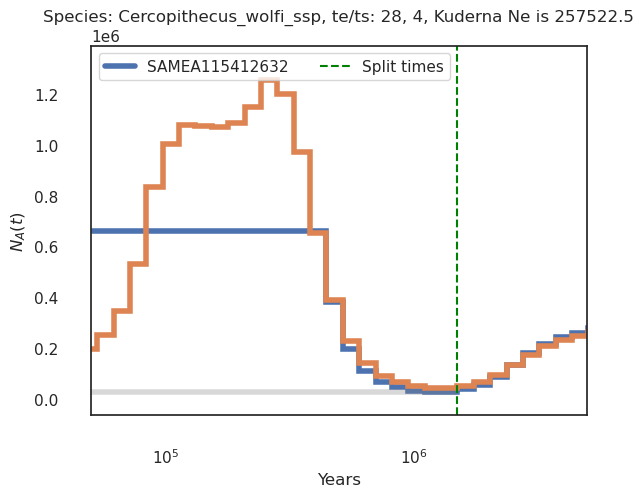

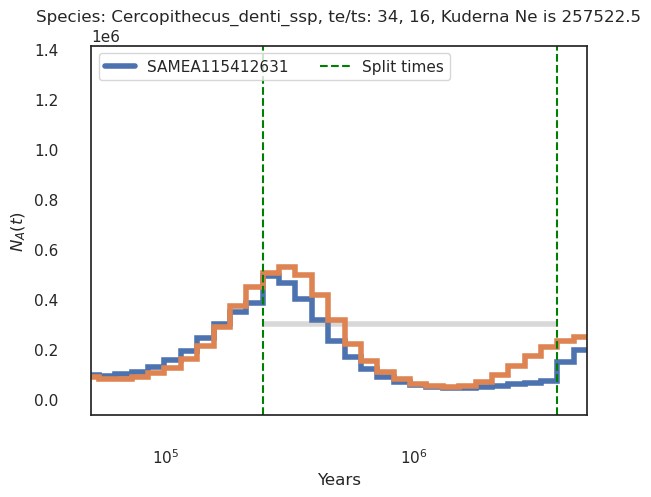

<Figure size 640x480 with 0 Axes>

In [11]:
for d in metadata_dirs:
    # Identify IDs
    dir_metadata = pd.read_csv(d, sep="\t")
    dir_metadata["gss"] = dir_metadata.GENUS+"_"+dir_metadata.SPECIES+"_"+dir_metadata.SUBSPECIES
    short_species = d.split("/")[-1].split("_")[0]
    female_df = dir_metadata[pd.to_numeric(dir_metadata['AVG_COVERAGE_X'], errors='coerce').notnull()]
    female_df = female_df.loc[(female_df.GENETIC_SEX == "F") & (female_df.AVG_COVERAGE_A >= 10)].sort_values(by="AVG_COVERAGE_A", ascending=False)
    sorted_df = female_df
    # Go through every unique genotype calling set.
    for gvcf_folder in sorted_df.GVCF_FOLDER.unique():
        print(gvcf_folder)
        # Pick all inds that are present in the cobraa analysis.
        species_df = sorted_df.loc[sorted_df.GVCF_ID.isin(ind_list) & (sorted_df.GVCF_FOLDER == gvcf_folder)]
        for ind in species_df.GVCF_ID:
            structured_files = glob.glob(f'../steps/cobraa/{ind}/aut_D50_ts*_te*_final_parameters.txt')
            zte, zts, ztheta, zrho, zgamma, lambdaA_parameters, lambdaB_parameters, best_param_file = find_best(structured_files)
            label_tag = best_param_file.split("/")[-2]
            print(zte, zts, zgamma, best_param_file)
            ind_inf = all_inds.loc[all_inds.GVCF_ID == label_tag]
            gs = ind_inf.GENUS.iloc[0]+"_"+ind_inf.SPECIES.iloc[0]
            gs_df = df_species_mut.loc[df_species_mut.SPECIES_BINOMIAL == gs]
            g_df = df_species_mut.loc[df_species_mut.GENUS == ind_inf.GENUS.iloc[0]] 
            if len(gs_df) > 0:
                mu = gs_df.MU_PER_GENERATION.mean()
                gen = gs_df.GENERATION_LENGTH.mean()
                kuderna_Ne = gs_df.EFFECTIVE_POP_SIZE.mean()
            elif len(g_df) > 0:
                mu = g_df.MU_PER_GENERATION.mean()
                gen = g_df.GENERATION_LENGTH.mean()
                kuderna_Ne = g_df.EFFECTIVE_POP_SIZE.mean()
            print(mu, gen)
            final_params = np.loadtxt(best_param_file)
            time_array = list(final_params[:,1])
            time_array.insert(0,0)
            time_array = np.array(time_array)
            plt.stairs(edges=(time_array/mu)*gen,values=(1/final_params[:,2])/mu,label=label_tag,linewidth=4,linestyle="solid",baseline=None)
            plt.stairs(edges=(time_array[zts:zte+1]/mu)*gen,values=(1/final_params[zts:zte,3])/mu,label='',linewidth=4,linestyle="solid",baseline=None,color="grey",alpha=0.3)
            plt.axvline((time_array[zts]/mu)*gen,color="green",linestyle="dashed")  
            plt.axvline((time_array[zte]/mu)*gen,label="Split times",color="green",linestyle="dashed")    
            plt.xlim(5e+04,5e+06)
            #plt.ylim(0,20e+04)
            plt.xscale('log')
            plt.ylabel('$N_A(t)$')
            plt.xlabel('Years')
            plt.tick_params(which='major',length=20)
            plt.tick_params(which='minor',length=10)
            plt.legend(ncol=2)
            # Unstructured for comp
            final_params = np.loadtxt(f'../steps/cobraa/{ind}/aut_final_parameters.txt')
            time_array = list(final_params[:,1])
            time_array.insert(0,0)
            time_array = np.array(time_array)
            plt.stairs(edges=(time_array/mu)*gen,values=(1/final_params[:,2])/mu,label=label_tag,linewidth=4,linestyle="solid",baseline=None)
            plt.xlim(5e+04,5e+06)
            #plt.ylim(0,20e+04)
            plt.xscale('log')
            plt.ylabel('$N_A(t)$')
            plt.xlabel('Years')
            plt.tick_params(which='major',length=20)
            plt.tick_params(which='minor',length=10)
            plt.title("Species: {}, te/ts: {}, {}, Kuderna Ne is {}".format(gvcf_folder, zte, zts, kuderna_Ne))
            plt.figure()

Decode check

In [12]:
def get_all_A_indices(D_flat,ts,te):
    pre_struct = [i for i in range(0,ts)]
    in_struct = [ts + (j)*2 for j in range(0,te-ts)]
    post_struct = [ts + (te-ts)*2 + (j)*3 for j in range(0,D-te)]
    all_A_indices = pre_struct + in_struct + post_struct
    return all_A_indices

def get_all_B_indices(D_flat,ts,te):
    in_struct = [ts + ((j)*2+1) for j in range(0,te-ts)]
    post_struct = [ts + (te-ts)*2+ (j)*3+1 for j in range(0,D-te)]
    all_B_indices = in_struct + post_struct
    return all_B_indices


def get_AB_poststruct_indices(D_flat,ts,te):
    AB_indices = [ts + (te-ts)*2 + (j)*3+2 for j in range(0,D-te)]
    return AB_indices

In [13]:
D = 50 # number of discrete time intervals in the HMM
T_1 = 4 # composite ML estimate of admixture time
T_2 = 28 # composite ML estimate of divergence time
T_2_flat = T_1+(T_2-T_1)*2 # index of T_2 in flatten HMM transition matrix
D_flat = T_1 + (T_2-T_1)*2 + (D-T_2)*3 # number of indices in posterior decoding; there are 32 time intervals and T_1 and T_2 are 13 and 21 respectively. Before T_1 only c=AA is possible; between T_1 and T_2 c=AA or C=BB is possible; after T_2 c=AA, c=BB and c=AB are possible
all_A = get_all_A_indices(D_flat,T_1,T_2) # indices of c=AA
all_B = get_all_B_indices(D_flat,T_1,T_2) # indices of c=BB ( implicitly, t>T_1 for c=BB to have non zero probability)
all_AB = get_AB_poststruct_indices(D_flat,T_1,T_2) # indices of c=AB
all_A_given_t_bigger_ts = [i for i in all_A if i>=T_1] # indices of c=AA and t>T_1
all_A_given_t_bigger_te = [i for i in all_A if i>=T_2_flat] # indices of c=AA and t>T_2
all_B_given_t_bigger_te = [i for i in all_B if i>=T_2_flat] # indices of c=B and t>T_2
all_AB_given_t_bigger_te = [i for i in all_AB if i>=T_2_flat] # indices of c=AB and t>T_2
all_A_given_t_bigger_ts_smaller_te = [i for i in all_A if i>=T_1 and i<T_2_flat] # indices of c=AA and T_1<t<T_2
all_B_given_t_bigger_ts_smaller_te = [i for i in all_B if i>=T_1 and i<T_2_flat] # indices of c=BB and T_1<t<T_2
t_in_structured_period = [i for i in range(T_1,T_2_flat)] # index of t for structured period
step_size=400*25 # length between base pairs of posterior decoding

In [15]:
decode_file = '../steps/cobraa/PD_0032/aut_CM053397.1_decode.txt' # change to path of decoding file
decode = np.loadtxt(decode_file) # load file
decode_position = decode[0,:] # get the genomic position
posterior = decode[1:,:] # get the full posterior, this must sum to 1

prob_AA_marginal = posterior[all_A,:].sum(axis=0) # P(c=AA|X)
prob_BB_marginal = posterior[all_B,:].sum(axis=0) # P(c=BB|X)
prob_AB_marginal = posterior[all_AB,:].sum(axis=0) # # P(c=AB|X)

In [22]:
prob_BB_marginal.argmax(), prob_BB_marginal.max()

(71, 0.9480768169177786)

In [23]:
prob_AA_marginal.sum(), prob_BB_marginal.sum(), prob_AB_marginal.sum()

(1028.4058411360236, 394.4129942755535, 771.1811645884229)

In [24]:
(prob_BB_marginal.sum()+prob_AB_marginal.sum()/2)/posterior.sum()

0.35551667118038527

Text(0.5, 1.0, 'Full posterior')

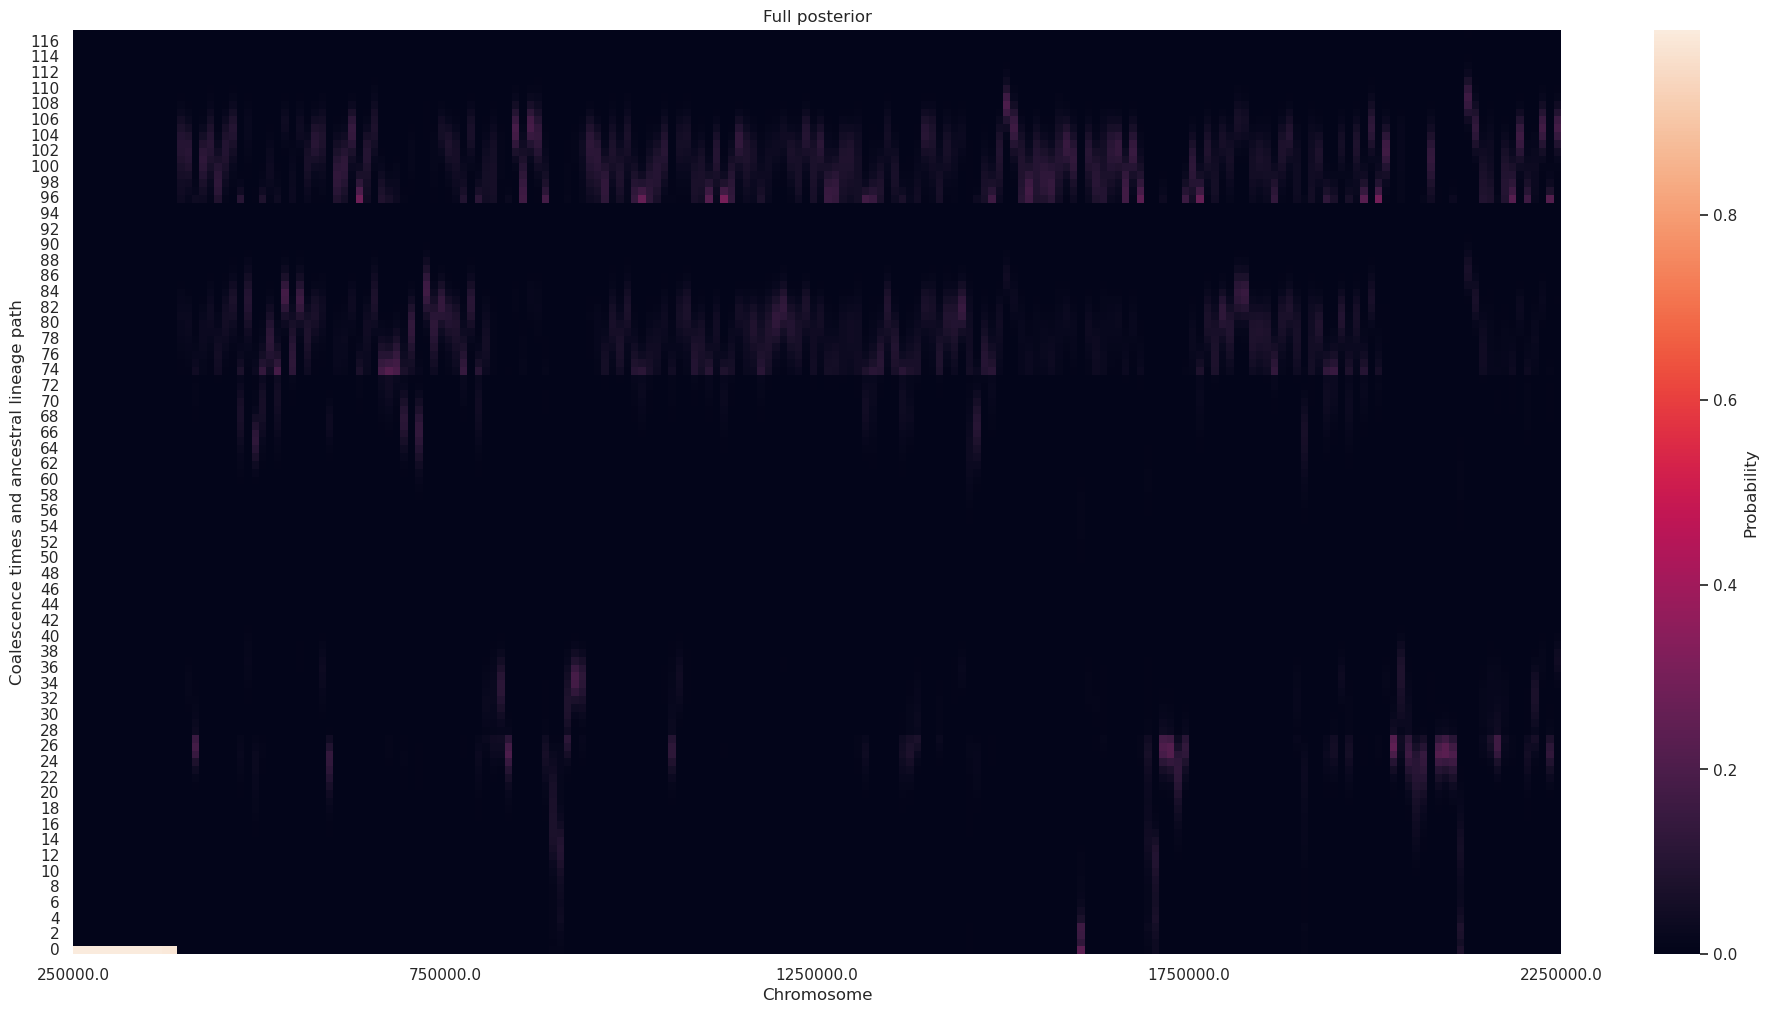

In [33]:
start = 25
end = 225
num_xticks = 5
xtickslocs = np.linspace(start,end,num_xticks) - start
xtickslabs = [i for i in np.linspace(start,end,num_xticks)*step_size]

plt.rcParams['figure.figsize'] = [24, 12] 
plt.rcParams.update({'font.size': 25})

np.linspace(start,end,num_xticks)*step_size

# full posterior (coalescence times and lineage paths)
ax = sns.heatmap(np.concatenate([posterior[all_A,:], posterior[all_B,:], posterior[all_AB,:]])[:,start:end],cbar_kws={'label': 'Probability'})
# ax.set_yticks(ticks=ydom,labels=yticks_labs,rotation='horizontal')
ax.set_xticks(ticks=xtickslocs,labels=xtickslabs,rotation='horizontal')
ax.set_xlabel('Chromosome')
ax.set_ylabel('Coalescence times and ancestral lineage path')
ax.invert_yaxis()
ax.set_title('Full posterior')

#plt.show()

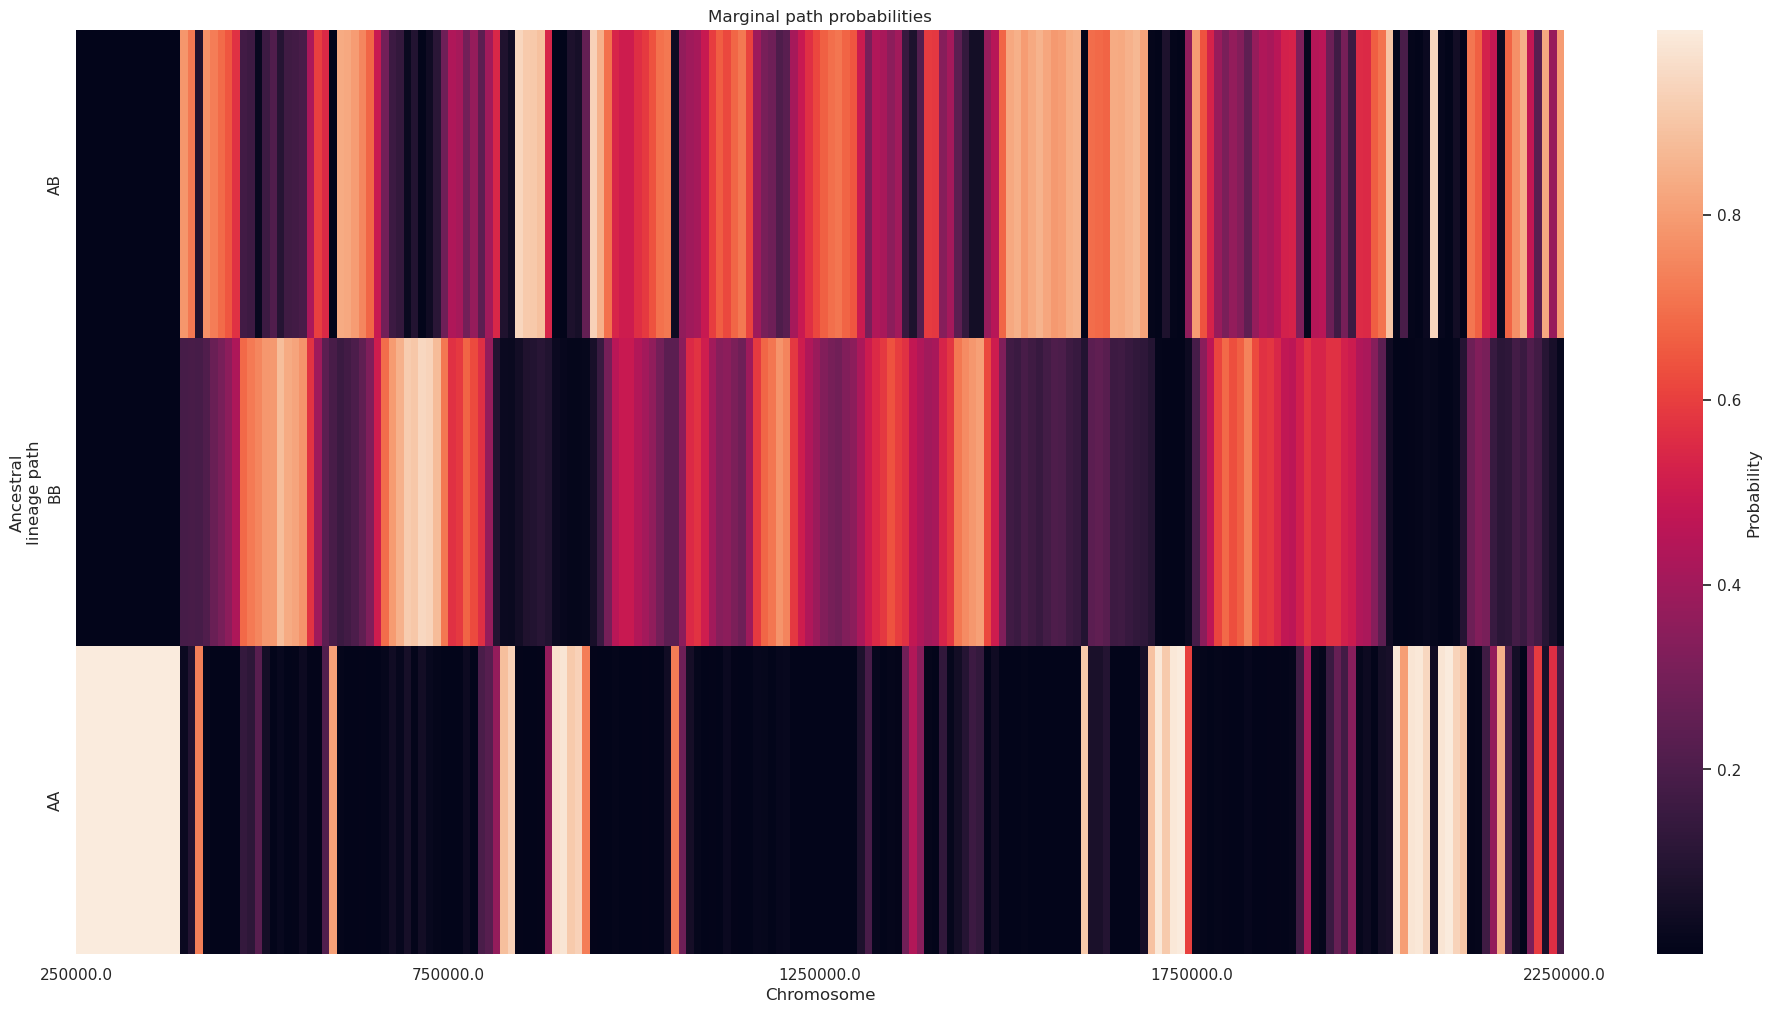

In [32]:
# No conditioning
probs = np.array([prob_AA_marginal,prob_BB_marginal,prob_AB_marginal])
ax = sns.heatmap(probs[:,start:end],cbar_kws={'label': 'Probability'})
# ax.set_yticks(ticks=ydom,labels=yticks_labs,rotation='horizontal')
ax.set_xticks(ticks=xtickslocs,labels=xtickslabs,rotation='horizontal')
ax.set_xlabel('Chromosome')
ax.set_ylabel('Ancestral\nlineage path')
plt.yticks([0.5,1.5,2.5],['AA','BB','AB'])
ax.invert_yaxis()
ax.set_title('Marginal path probabilities')
plt.show()

<Axes: ylabel='Count'>

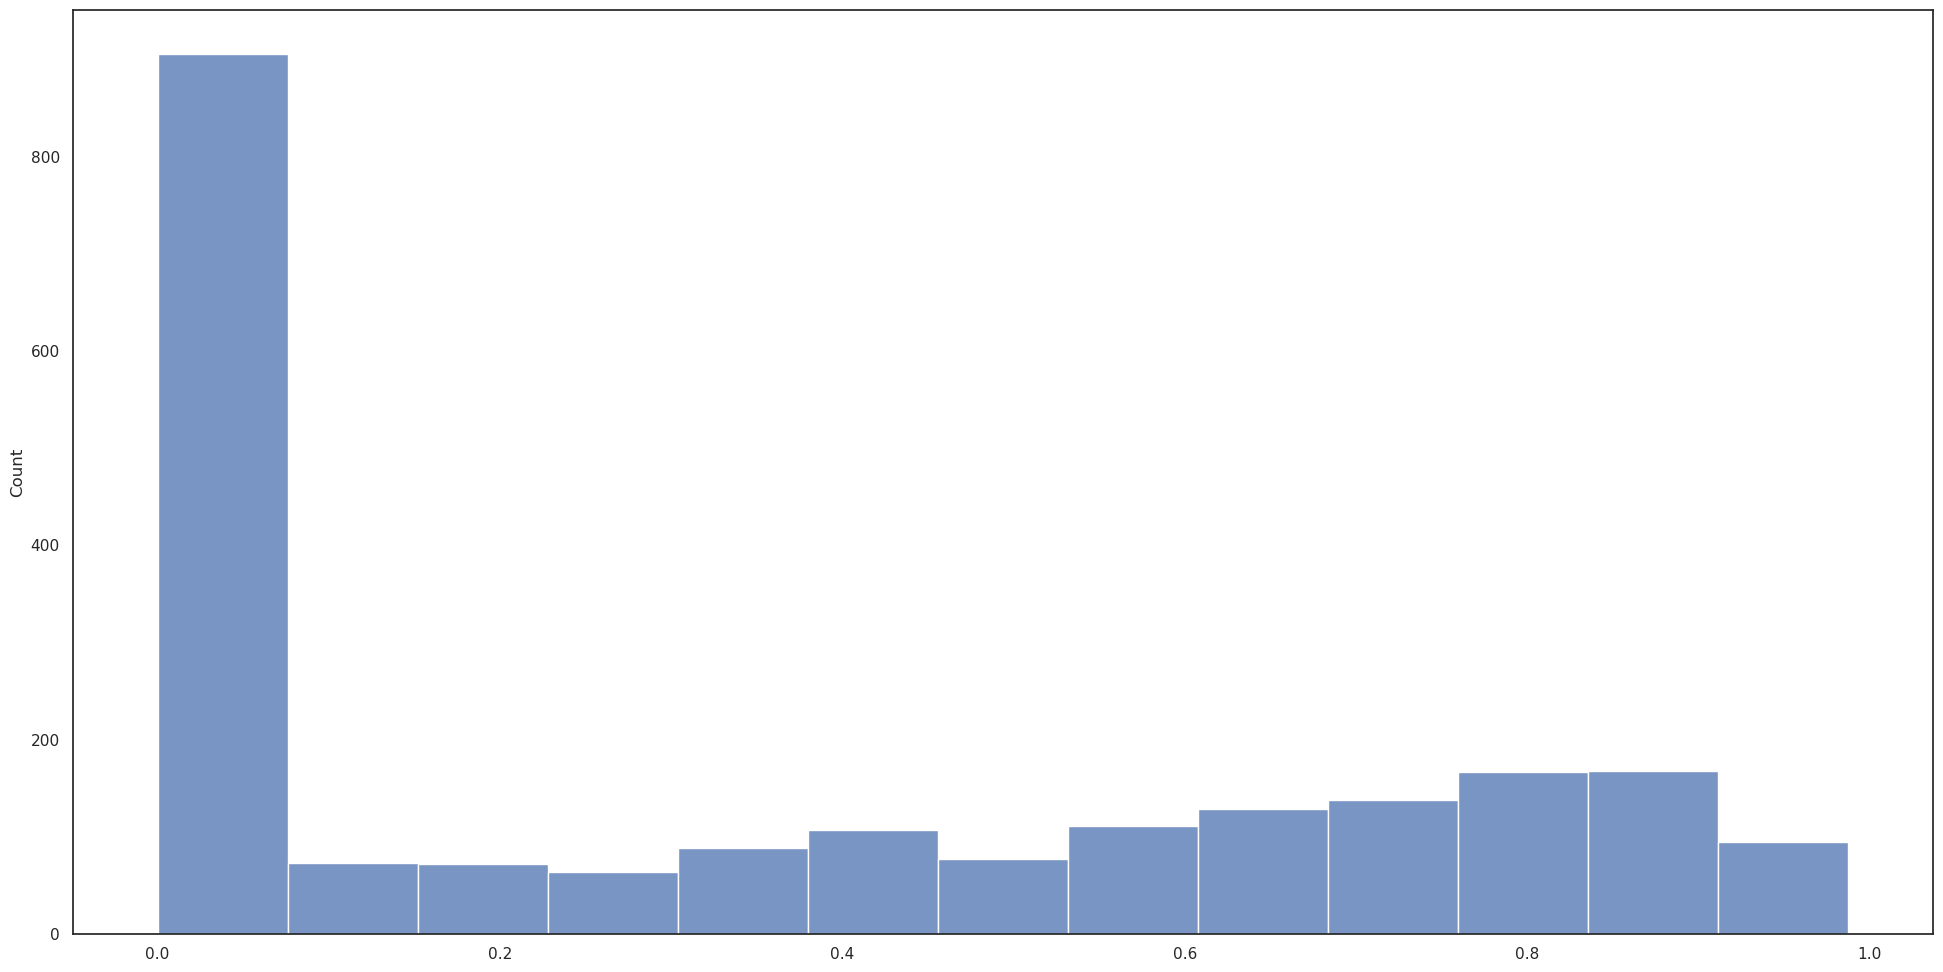

In [35]:
sns.histplot(prob_AB_marginal)